# SHAP-Style Plots  Documentation

This notebook is designed to demonstrate how to use `mintpy` to plot SHAP-style. For more information on dataset and initializing `InterpretToolkit`, see the permutatation importance notebook.

In [1]:
import sys, os 
current_dir = os.getcwd()
path = os.path.dirname(current_dir)
sys.path.append(path)
import numpy as np
import pandas as pd
import shap

In [2]:
import mintpy
import plotting_config 

### Loading the training data and pre-fit models 


In [3]:
model_objs, model_names = mintpy.load_models()
examples, targets = mintpy.load_data()

In [4]:
pos_indices = np.where(targets>0)[0]
neg_indices = np.where(targets<1)[0]
pos_examples = examples.iloc[pos_indices,:]
neg_examples = examples.iloc[neg_indices,:]

neg_examples_subset = neg_examples.sample(n=len(pos_examples), axis='index')
examples_balanced = pd.concat([pos_examples, neg_examples_subset], axis='index', ignore_index=True)
print(len(examples_balanced))

some_examples = examples.sample(n=500, axis='index')
prediction = model_objs[0].predict_proba(some_examples)[:,1]
print(np.mean(prediction))

78346
0.4179221222543995


In [5]:
examples_subset = shap.sample(examples_balanced, 500, random_state=42)
myInterpreter = mintpy.InterpretToolkit(model=model_objs[0], 
                                 model_names=model_names[0],
                                 examples=examples_subset, 
                                 targets=targets,
                                )

## Summary Plot

Performing random sampling (N=100) to subset the data for the background dataset...
trying TreeExplainer...


100%|===================| 997/1000 [03:15<00:00]        

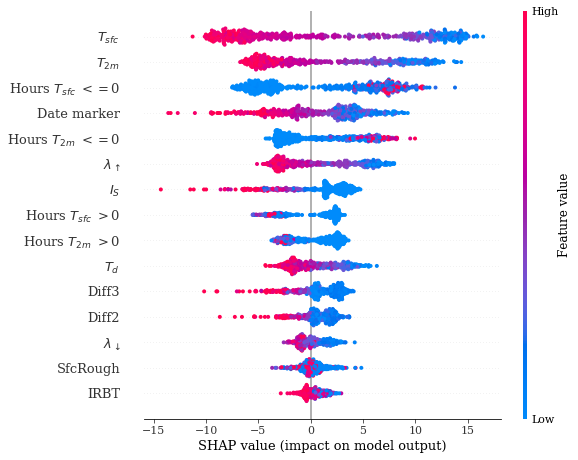

In [6]:
myInterpreter.plot_shap(features=None,
                        display_feature_names = plotting_config.pretty_names,
                        plot_type='summary', 
                        data_for_shap=examples, 
                        subsample_size=100,
                        performance_based=False)

### Dependence Plot

Performing random sampling (N=100) to subset the data for the background dataset...
trying TreeExplainer...


100%|===================| 998/1000 [03:19<00:00]        

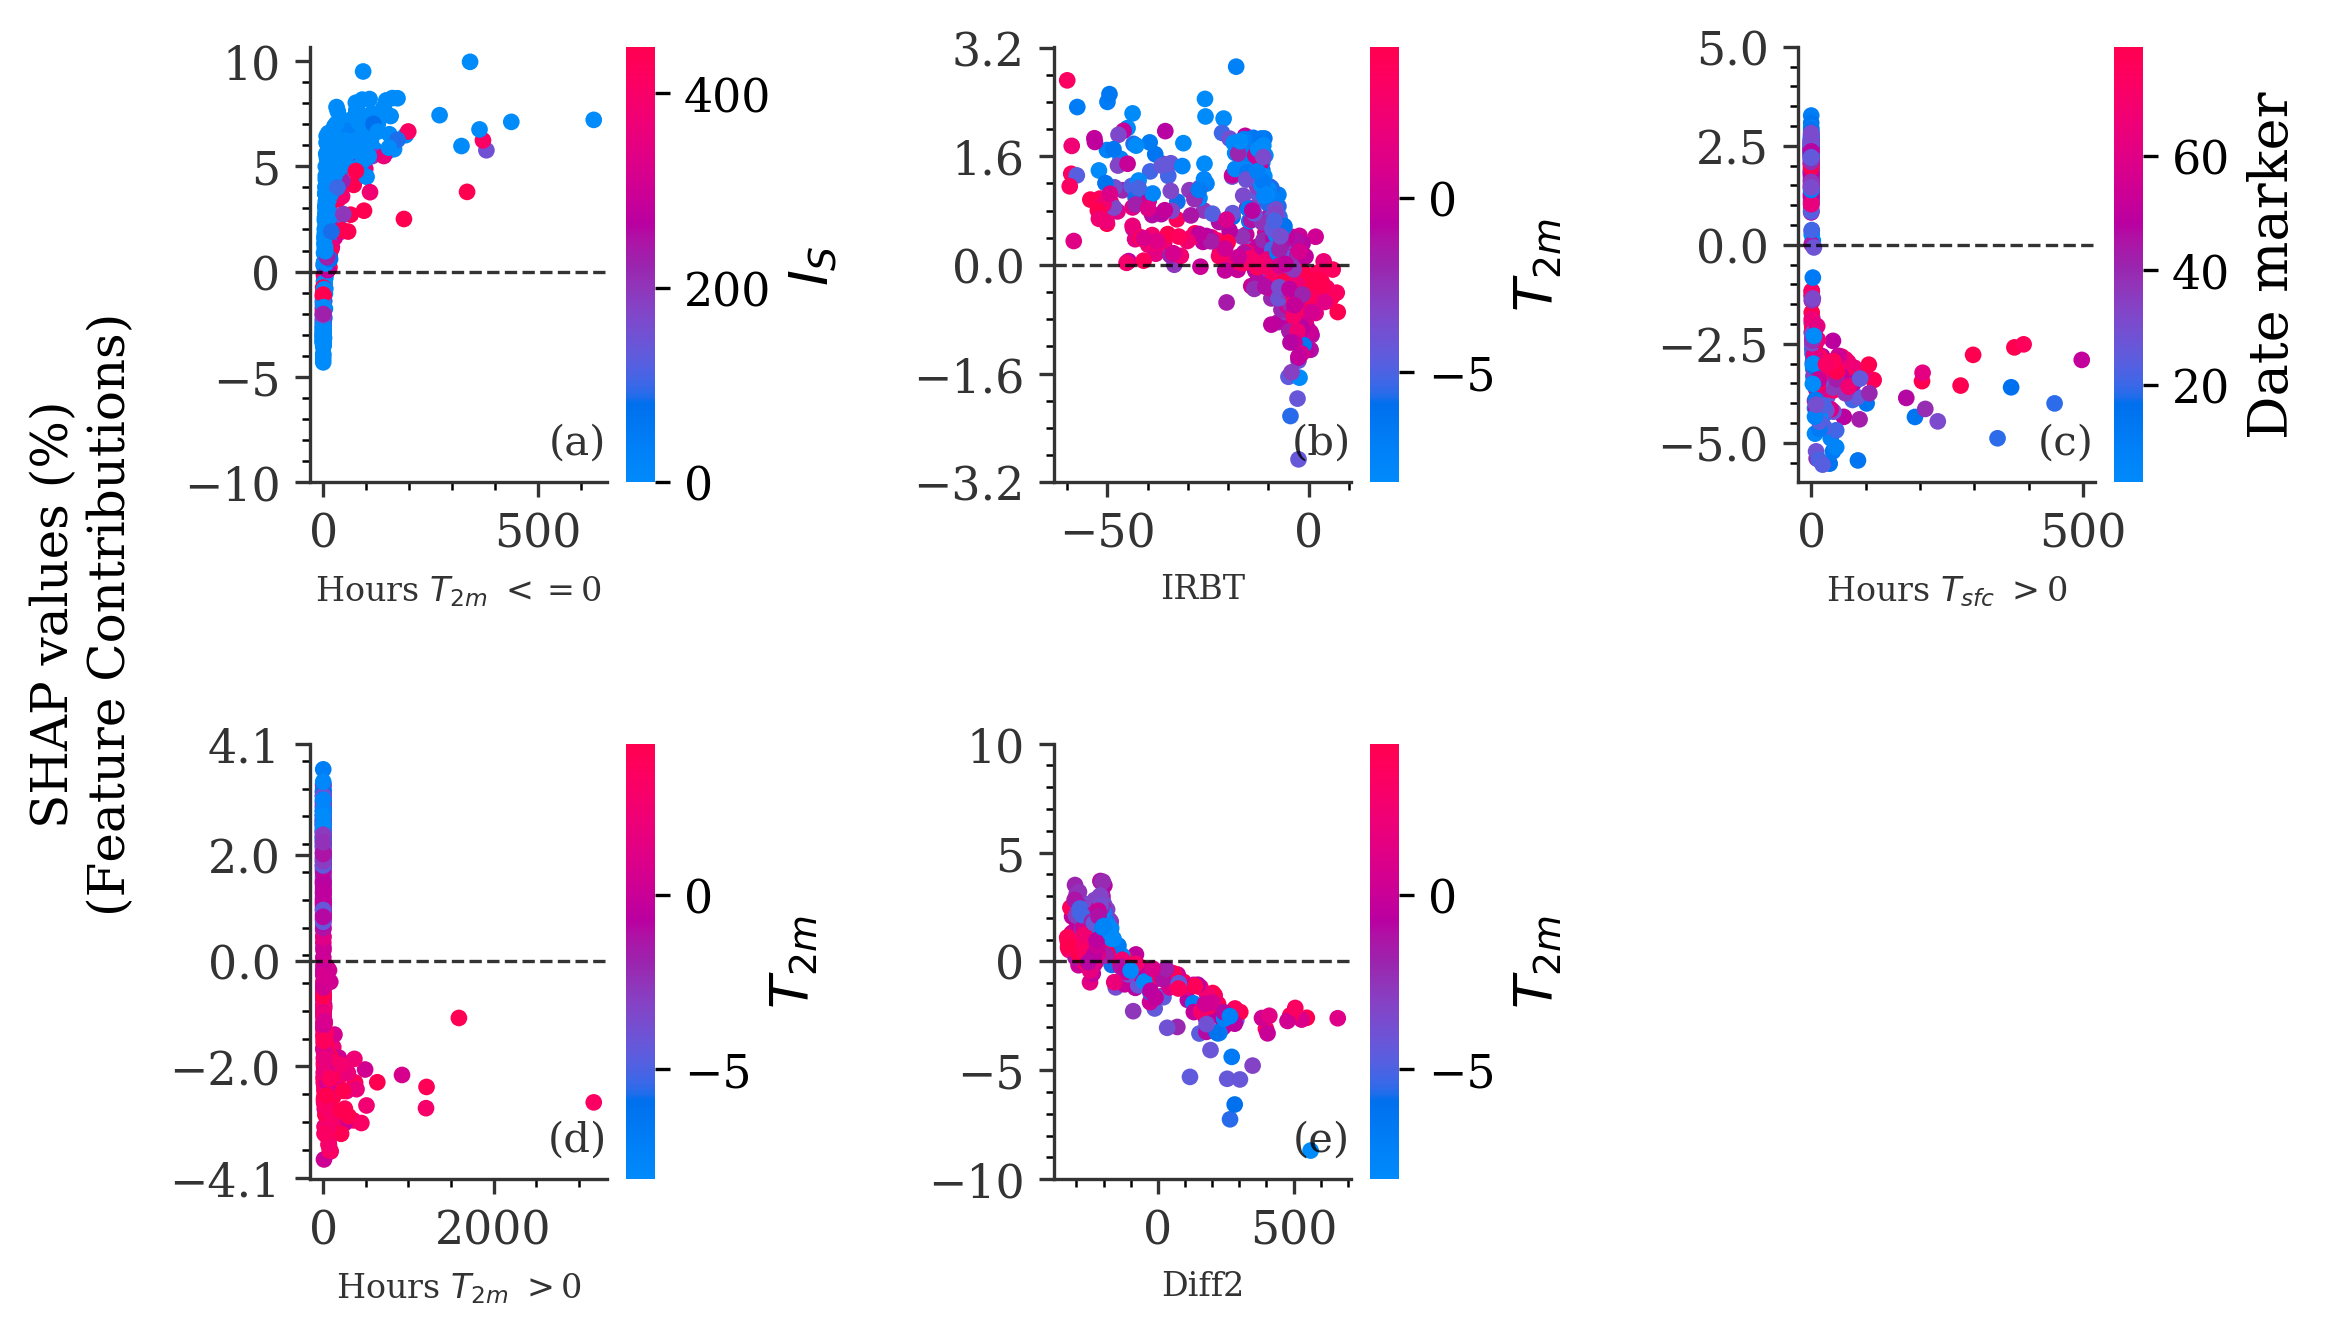

In [7]:
features = ['tmp2m_hrs_bl_frez', 'sat_irbt', 'sfcT_hrs_ab_frez', 'tmp2m_hrs_ab_frez', 'd_rad_d']
myInterpreter.plot_shap(features=features,
                        display_feature_names = plotting_config.display_feature_names,
                        plot_type='dependence', 
                        data_for_shap=examples, 
                        subsample_size=100,
                        performance_based=False)